In [20]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt

In [9]:
# reading data
dataset = pd.read_csv('../../public/mnist_train.csv', encoding='utf-8')
test_dataset = pd.read_csv('../../public/mnist_test.csv', encoding='utf-8')

In [10]:

# setting up dev dataset
# dev_dataset = dataset.sample(frac=0.1, random_state=1000)
data = np.array(dataset)
data_set  = data.T
label = data_set[0]
pixel_set = data_set[1:]
pixel_set = pixel_set / 255.0

m, n = data.shape
np.random.shuffle(data)
data_dev = data[0:1000].T
X_dev = data_dev[1: n]
X_dev = X_dev / 255.0
Y_dev = data_dev[0]
data_train = data[2:].T
X_train = data_train[1: n]
X_train = X_train / 255.0
Y_train = data_train[0]


test_set = np.array(test_dataset).T
test_label = test_set[0]
test_set = test_set / 255.0
test_pixel_set = test_set[1:]

In [11]:
def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.random.randn(10, 1) * 0.01
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.random.randn(10, 1) * 0.01
    return W1, b1, W2, b2

def one_hot_encode(Y):
    """
        - One-hot encodes the labels
        - Y: array of labels
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def ReLU(Z):
    """
        - Rectified Linear Unit (ReLU) activation function
        - Returns x if x > 0 else 0
    """
    return np.maximum(0, Z)

def derivative_ReLU(Z):
    """
        - Derivative of ReLU function
        - Returns 1 if Z > 0 else 0
    """
    return (Z > 0).astype(int)

def softmax(Z):
    """
        - Softmax activation function
        - Converts logits to probabilities
    """
    exp_x = np.exp(Z - np.max(Z))
    sum_exp_x = exp_x.sum(axis=0, keepdims=True)
    return exp_x / (sum_exp_x + 1e-8)


In [12]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return A1, Z1, A2, Z2

def back_propagation(Z1, A1, A2, W2, X, Y):
    one_hot_Y = one_hot_encode(Y)
    m = Y.size
    dZ2 =A2 - one_hot_Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(params, grads, learning_rate):
    W1, b1, W2, b2 = params
    dW1, db1, dW2, db2 = grads
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    # return np.mean(predictions == np.argmax(Y, axis=0))
    return np.sum(predictions == Y) / Y.size

def compute_loss(A2, Y):
    one_hot_Y = one_hot_encode(Y)
    m = Y.size
    # Avoid log(0) by adding a small epsilon
    log_probs = np.log(np.clip(A2, 1e-8, 1.0))
    loss = -np.sum(one_hot_Y * log_probs) / m
    return loss

In [14]:
def gradient_descent(X, Y, iterations, learning_rate):
    initials = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, *initials)
        grads = back_propagation(Z1, A1, A2, initials[2], X, Y)
        initials = update_params(initials, grads, learning_rate)
        if i % 100 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            loss = compute_loss(A2, Y)
            print(f"Iteration {i}, accuracy: {accuracy}, loss: {loss}")
    return initials


In [21]:
config = gradient_descent(X_train, Y_train, 2000, 0.05)
# config = gradient_descent(pixel_set, label, 2000, 0.05)
W1, b1, W2, b2 = config

params_dict = {
    "W1": W1.tolist(),
    "b1": b1.tolist(),
    "W2": W2.tolist(),
    "b2": b2.tolist()
}

with open("model_params.json", "w") as f:
    json.dump(params_dict, f)

Iteration 0, accuracy: 0.1242767514813524, loss: 14.796496254624726
Iteration 100, accuracy: 0.5748867201115371, loss: 1.9816393851654102
Iteration 200, accuracy: 0.6856744510282329, loss: 1.261571665420069
Iteration 300, accuracy: 0.7444405716277449, loss: 1.030748160032945
Iteration 400, accuracy: 0.7578947368421053, loss: 0.9308815180255547
Iteration 500, accuracy: 0.774102474729871, loss: 0.8768532624317393
Iteration 600, accuracy: 0.7988323457650749, loss: 0.833448148074911
Iteration 700, accuracy: 0.8177413733008017, loss: 0.794999499669323
Iteration 800, accuracy: 0.8323109097246427, loss: 0.7676209372741566
Iteration 900, accuracy: 0.8440397350993377, loss: 0.7447248138807409
Iteration 1000, accuracy: 0.8528929940745904, loss: 0.7285135715370316
Iteration 1100, accuracy: 0.8586266991983269, loss: 0.715009710422733
Iteration 1200, accuracy: 0.8623213663297317, loss: 0.7068467622042719
Iteration 1300, accuracy: 0.8650923666782852, loss: 0.699331428840348
Iteration 1400, accuracy:

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, A2, _ = forward_propagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = test_pixel_set[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    actual = test_label[index]

    print(f"Predicted: {prediction}, Actual: {actual}")
    actual_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(actual_image, interpolation='nearest')
    plt.show()
    # return prediction, actual

Predicted: [4], Actual: 5


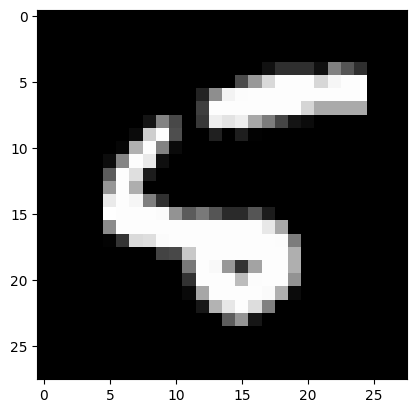

In [23]:
test_prediction(8, *config)